In [15]:
from jupyter_default import *
import warping
import lib as ll

In [16]:
set_cell_width()

In [4]:
img6 = imread('data/img006.tif')
img6lut = imread('data/labels_lut.tif')
img6_w_labs = np.concatenate([img6lut[:,:,[0]], img6], axis=2)
inds, traindata = ll.fixlabels(img6_w_labs)

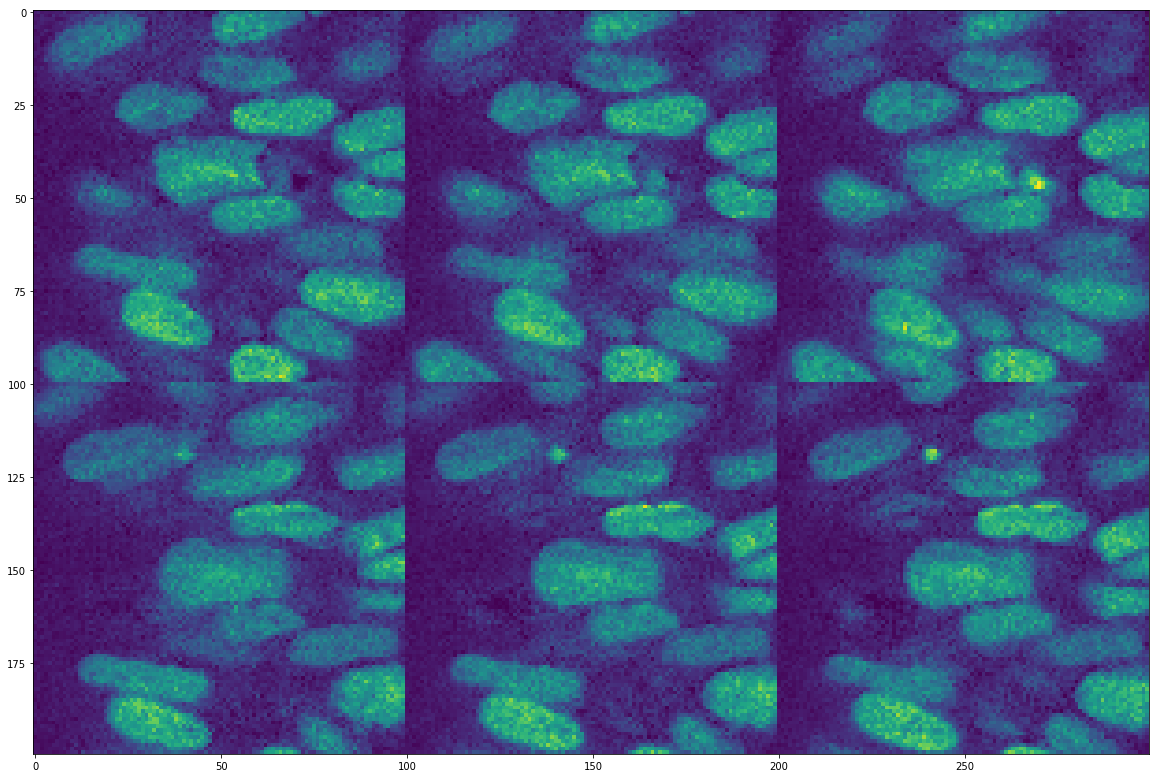

In [7]:
## plot grid of img6 subset
x = img6[[0,1]]
x = x[:,[0,1,2]]
x = x[:,:,[1],::4,::4]
x = perm(x,"tzcyx","tyzxc")
a,b,c,d,e = x.shape
x = x.reshape((a*b,c*d*e))
imshow(x, cb=False)

In [ ]:
## arrange into xs and ys
xs_xy = traindata[:,[1,2]].copy()
ys_xy = traindata[:,0].copy()

xs = perm(xs_xy,'zcyx','zyxc')
ys = ys_xy

In [19]:
name = 'training/t009/'

In [20]:
img = np.load('training/t009/img6pred_5class.npy')

In [21]:
img.shape

(11, 71, 400, 400, 5)

(-0.5, 399.5, 4399.5, -0.5)

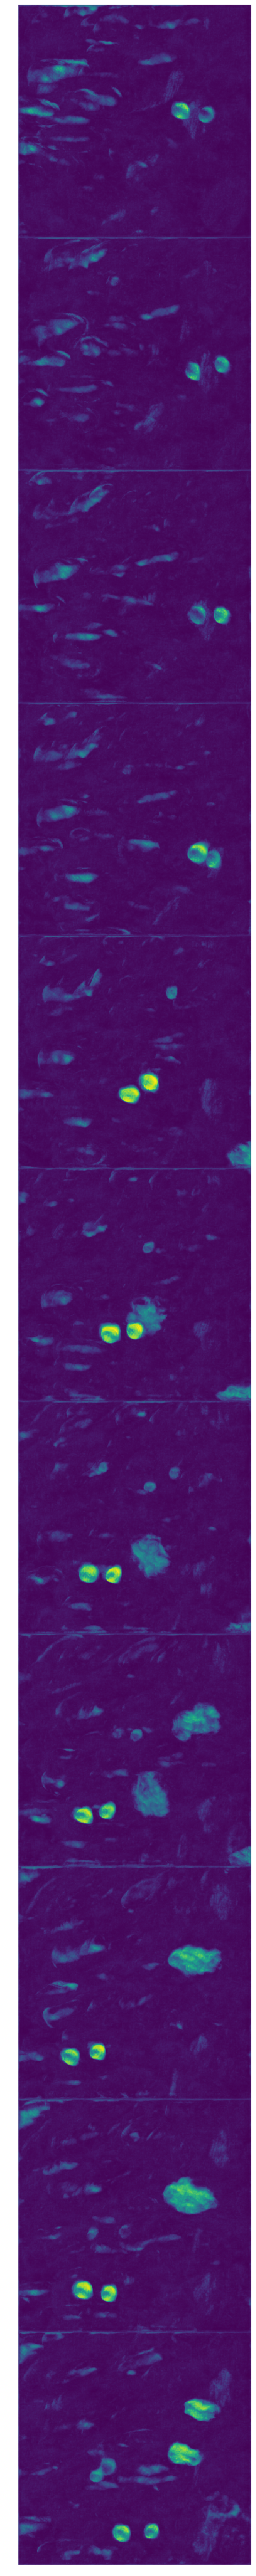

In [32]:
x = img[...,4].max(1)
x = x.reshape((11*400,400))
imshow(x, fs=(10,100), cb=False)
plt.axis('off')

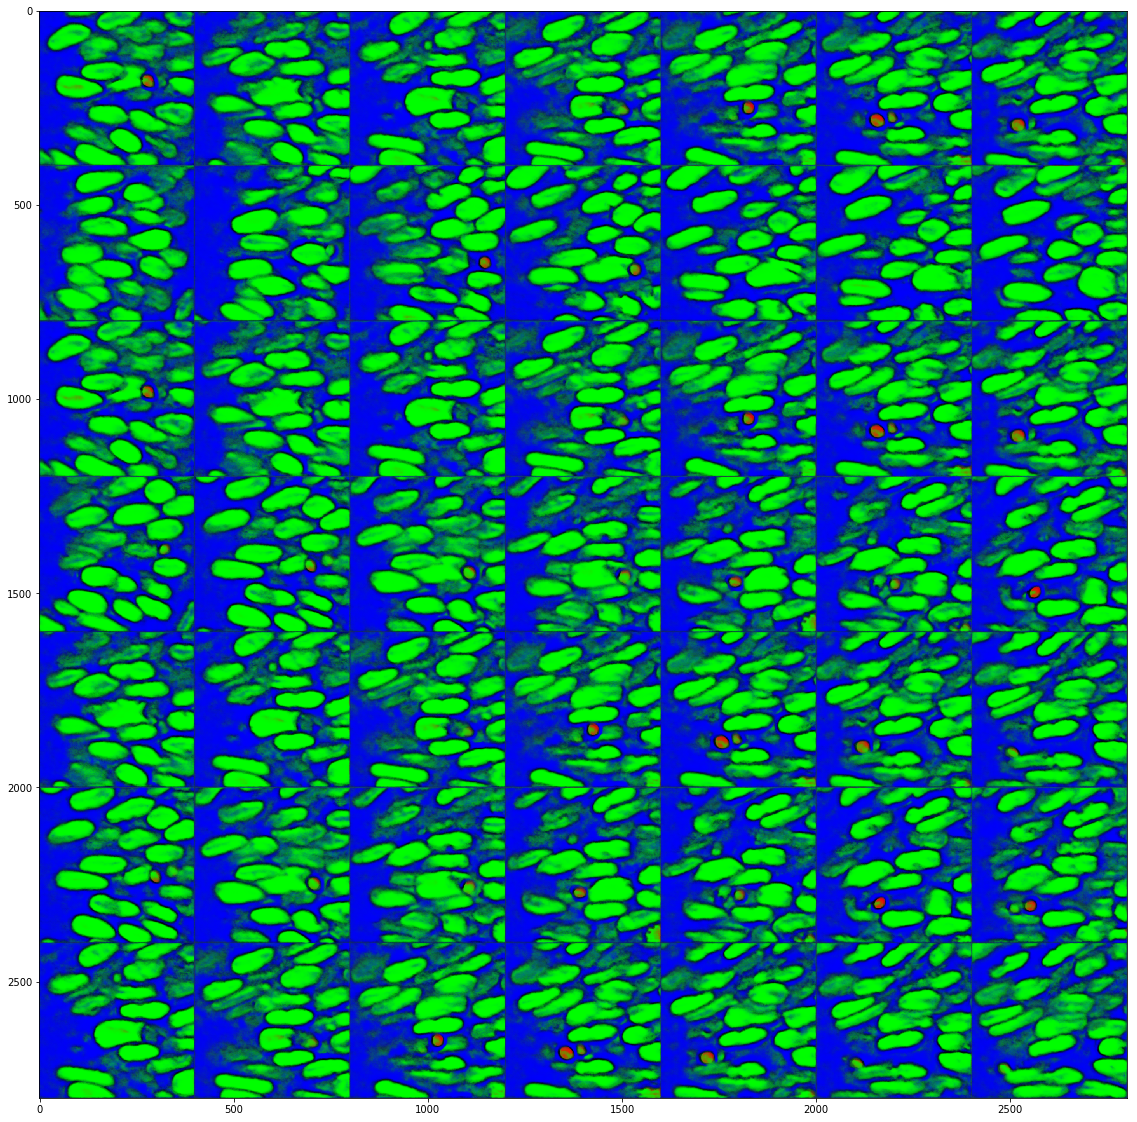

In [23]:
x = img[:,:,:,:]
a,b,c,d,e = x.shape
x = x.reshape((a,b,c,d,e))
div = x[:,::6,...,4].sum((2,3))

dc = np.sort(div.flat)[-20]
tz = np.argwhere(div > dc)[:7]

lst = list(range(x.shape[0]))
x2 = x[:,::6]
x2 = np.array([x2[timewindow(lst, n[0], 7), n[1]] for n in tz])
a,b,c,d,e = x2.shape
x2.shape
x2 = perm(x2,'12yxc','1y2xc')
a,b,c,d,e = x2.shape
x2 = x2.reshape((a*b,c*d,e))
imshow(x2[...,[4,1,0]], cb=False)